##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [1]:
%pip install pandas 
%pip install matplotlib
%pip install seaborn
%pip install plotly
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [2]:
# Can have as many cells as you want for code
import pandas as pd
filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

### 1 Exploring Data

In [3]:
catA_data = pd.read_csv(filepath)
catA_data.head()

LATITUDE   LONGITUDE        AccountID  \
0  1.285495  103.843852  LAKB2BID4559214   
1  1.291294  103.827476  LAKB2BID7610849   
2  1.300144  103.857517  LAKB2BID5461679   
3  1.300785  103.791263  LAKB2BID5088529   
4  1.298759  103.859430  LAKB2BID1268831   

                                     Company  SIC Code  \
0  FRANK CONSULTING SERVICES PRIVATE LIMITED    7361.0   
1       NEW DESERT ORCHID SHIPPING PTE. LTD.    4449.0   
2                2MBAO BIOCELLBANK PTE. LTD.    6719.0   
3                         NEWBLOOM PTE. LTD.    6719.0   
4               ASIA GREEN CAPITAL PTE. LTD.    6719.0   

                                            Industry  8-Digit SIC Code  \
0                                Employment Agencies        73610000.0   
1  Water Transportation of Freight, Not Elsewhere...        44490000.0   
2  Offices of Holding Companies, Not Elsewhere Cl...        67190000.0   
3  Offices of Holding Companies, Not Elsewhere Cl...        67190000.0   
4  Offices of Holding Companies, Not Elsewhere Cl...        67190000.0   

           8-Digit SIC Description  Year Found Entity Type  ...  \
0              Employment agencies      2020.0  Subsidiary  ...   
1  Water transportation of freight      2015.0  Subsidiary  ...   
2           Holding companies, nec      1993.0  Subsidiary  ...   
3           Holding companies, nec      2006.0  Subsidiary  ...   
4           Holding companies, nec      2006.0      Parent  ...   

  Employees (Global Ultimate Total) Sales (Domestic Ultimate Total USD)  \
0                               NaN                        2.209224e+06   
1                             100.0                        7.093536e+09   
2                               4.0                        1.026308e+06   
3                             100.0                        7.339898e+10   
4                               4.0                        4.322130e+05   

  Sales (Global Ultimate Total USD) Import/Export Status  Fiscal Year End  \
0                      4.637871e+06                  NaN              NaN   
1                      7.093536e+09                  NaN              NaN   
2                      1.026308e+06                  NaN              NaN   
3                      7.339898e+10                  NaN              NaN   
4                      4.322130e+05              Exports              NaN   

               Global Ultimate Company  Global Ultimate Country  \
0               FINDERS HOLDCO LIMITED           United Kingdom   
1                PETREDEC PTE. LIMITED                Singapore   
2  MADISON LIGHTERS AND WATCHES CO LTD            Hong Kong SAR   
3         WILMAR INTERNATIONAL LIMITED                Singapore   
4         ASIA GREEN CAPITAL PTE. LTD.                Singapore   

              Domestic Ultimate Company  Is Domestic Ultimate  \
0  FRANK RECRUITMENT GROUP PRIVATE LTD.                   0.0   
1                                   NaN                   0.0   
2           2MBAO BIOCELLBANK PTE. LTD.                   1.0   
3          WILMAR INTERNATIONAL LIMITED                   0.0   
4          ASIA GREEN CAPITAL PTE. LTD.                   1.0   

   Is Global Ultimate  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 1.0  

[5 rows x 28 columns]

In [4]:
# Exploring the data:
qualitative_columns = ['Company', 'Industry', '8-Digit SIC Description', 'Entity Type', 'Parent Company',
                       'Parent Country', 'Ownership Type', 'Company Status (Active/Inactive)', 'Import/Export Status',
                       'Global Ultimate Company', 'Global Ultimate Country', 'Is Domestic Ultimate']

# Print unique values for each selected column
for column in qualitative_columns:
    unique_values = catA_data[column].unique()
    print(f"Unique '{column}': {unique_values}")
print('-'*100)

# max and min for these columns
quantitative_columns =['LATITUDE', 'LONGITUDE', 'Year Found', 'Employees (Single Site)', 'Employees (Domestic Ultimate Total)',
                       'Employees (Global Ultimate Total)', 'Sales (Domestic Ultimate Total USD)', 'Sales (Global Ultimate Total USD)',
                       'Is Domestic Ultimate', 'Is Global Ultimate']
for column in quantitative_columns:
    max_values = catA_data[column].max()
    min_values = catA_data[column].min()
    print(f"Column '{column}': Min = {min_values}, Max = {max_values}")

Unique 'Company': ['FRANK CONSULTING SERVICES PRIVATE LIMITED'
 'NEW DESERT ORCHID SHIPPING PTE. LTD.' '2MBAO BIOCELLBANK PTE. LTD.' ...
 'ABRDN ASIA LIMITED' 'FANSIPAN HOLDINGS PTE. LTD.'
 'WHOLESOME FOOD PEOPLE PTE. LTD.']
Unique 'Industry': ['Employment Agencies'
 'Water Transportation of Freight, Not Elsewhere Classified'
 'Offices of Holding Companies, Not Elsewhere Classified'
 'Sanitary Services, Not Elsewhere Classified'
 "Drugs, Drug Proprietaries, and Druggists' Sundries"
 'General Medical and Surgical Hospitals'
 'Bread and Other Bakery Products, Except Cookies and Crackers'
 'Computer Related Services, Not Elsewhere Classified'
 'Laminated Plastics Plate, Sheet, and Profile Shapes'
 'Plastics Materials, Synthetic Resins, and Nonvulcanizable Elastomers'
 'Unit Investment Trusts, Face-Amount Certificate offices, and Closed-End Management Investment Offices'
 'Business Services, Not Elsewhere Classified'
 'Offices of Bank Holding Companies' 'Eating Places'
 'Automotive Repair 

Some Data Visualisation

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

Bar plot for entity type against average sales

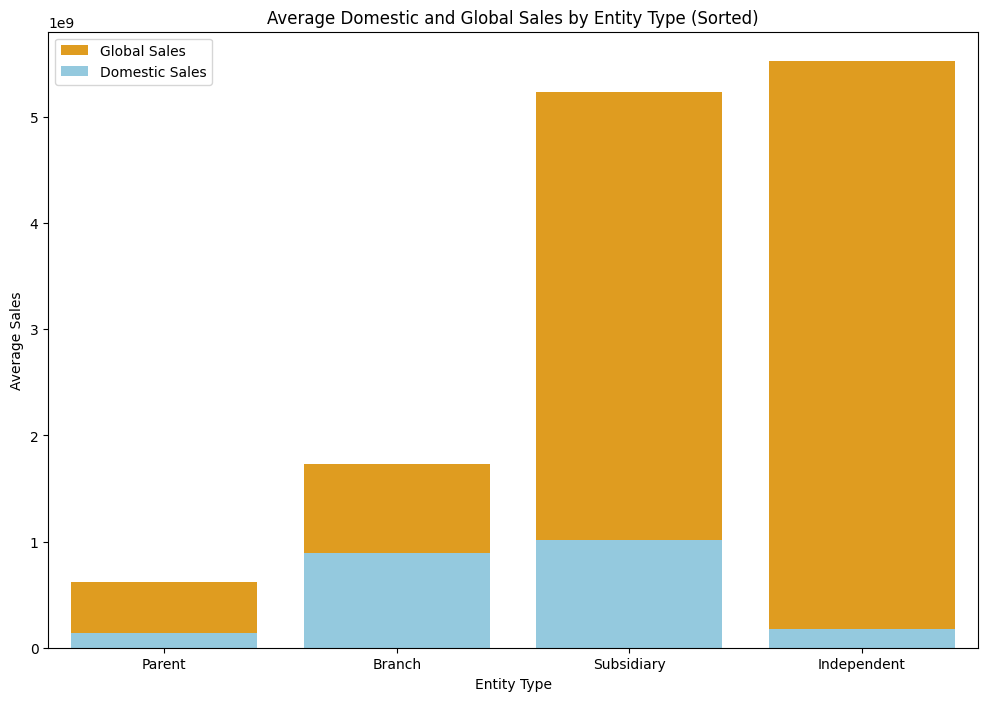

In [6]:
# Comparing domestic and global sales for each entity type
avg_domestic_sales = catA_data.groupby('Entity Type')['Sales (Domestic Ultimate Total USD)'].mean().reset_index()
avg_global_sales = catA_data.groupby('Entity Type')['Sales (Global Ultimate Total USD)'].mean().reset_index()

avg_sales = pd.concat([avg_domestic_sales, avg_global_sales['Sales (Global Ultimate Total USD)']], axis=1)
avg_sales_sorted = avg_sales.sort_values(by='Sales (Global Ultimate Total USD)')

plt.figure(figsize=(12, 8))

sns.barplot(x='Entity Type', y='Sales (Global Ultimate Total USD)', data=avg_sales_sorted, color='orange', label='Global Sales')
sns.barplot(x='Entity Type', y='Sales (Domestic Ultimate Total USD)', data=avg_sales_sorted, color='skyblue', label='Domestic Sales')

plt.title('Average Domestic and Global Sales by Entity Type (Sorted)')
plt.xlabel('Entity Type')
plt.ylabel('Average Sales')
plt.legend()
plt.show()

We observe that being an independent company generates the highest global sales, followed by subsidiary, branch and lastly, a parent company. For domestic sales, we can see that being a subsidiary company generates the highest sales, followed by branch, independent and lastly, a parent company.   

Bar plot for ownership type against average sales

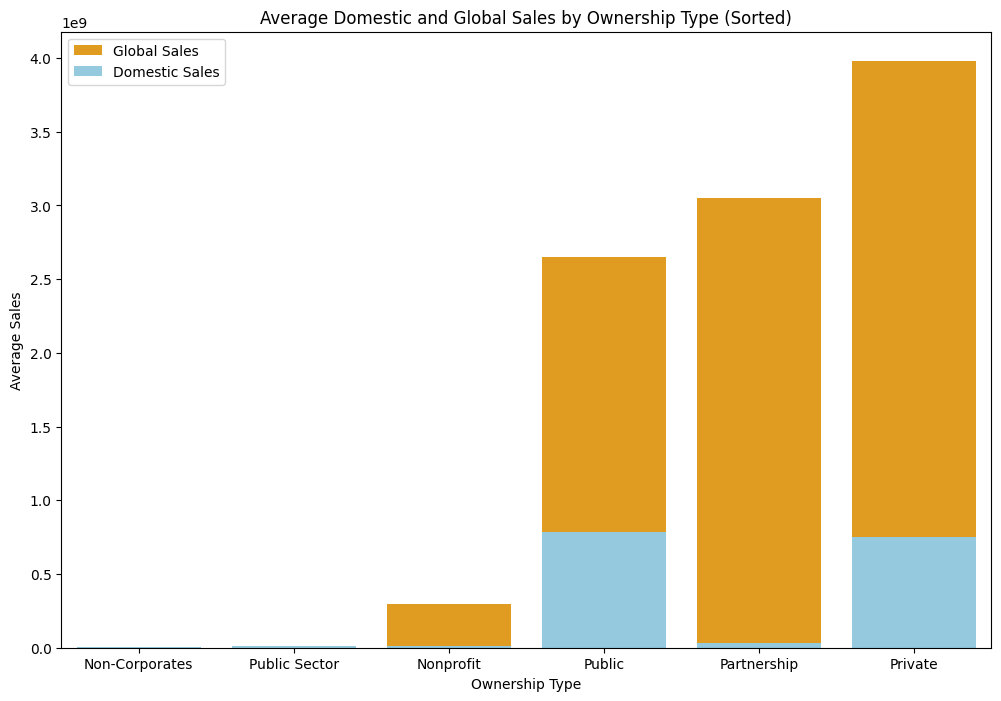

In [7]:
# Comparing domestic and global sales for each ownership type
avg_domestic_sales = catA_data.groupby('Ownership Type')['Sales (Domestic Ultimate Total USD)'].mean().reset_index()
avg_global_sales = catA_data.groupby('Ownership Type')['Sales (Global Ultimate Total USD)'].mean().reset_index()

avg_sales = pd.concat([avg_domestic_sales, avg_global_sales['Sales (Global Ultimate Total USD)']], axis=1)
avg_sales_sorted = avg_sales.sort_values(by='Sales (Global Ultimate Total USD)')

plt.figure(figsize=(12, 8))

sns.barplot(x='Ownership Type', y='Sales (Global Ultimate Total USD)', data=avg_sales_sorted, color='orange', label='Global Sales')
sns.barplot(x='Ownership Type', y='Sales (Domestic Ultimate Total USD)', data=avg_sales_sorted, color='skyblue', label='Domestic Sales')

plt.title('Average Domestic and Global Sales by Ownership Type (Sorted)')
plt.xlabel('Ownership Type')
plt.ylabel('Average Sales')
plt.legend()
plt.show()

We observe that if a company is privately owned, it is likely to generate higher sales as compared to a company that is non-coporates or in the public sector. 

Scatter plot of parent companies against sales

<Figure size 1200x800 with 0 Axes>

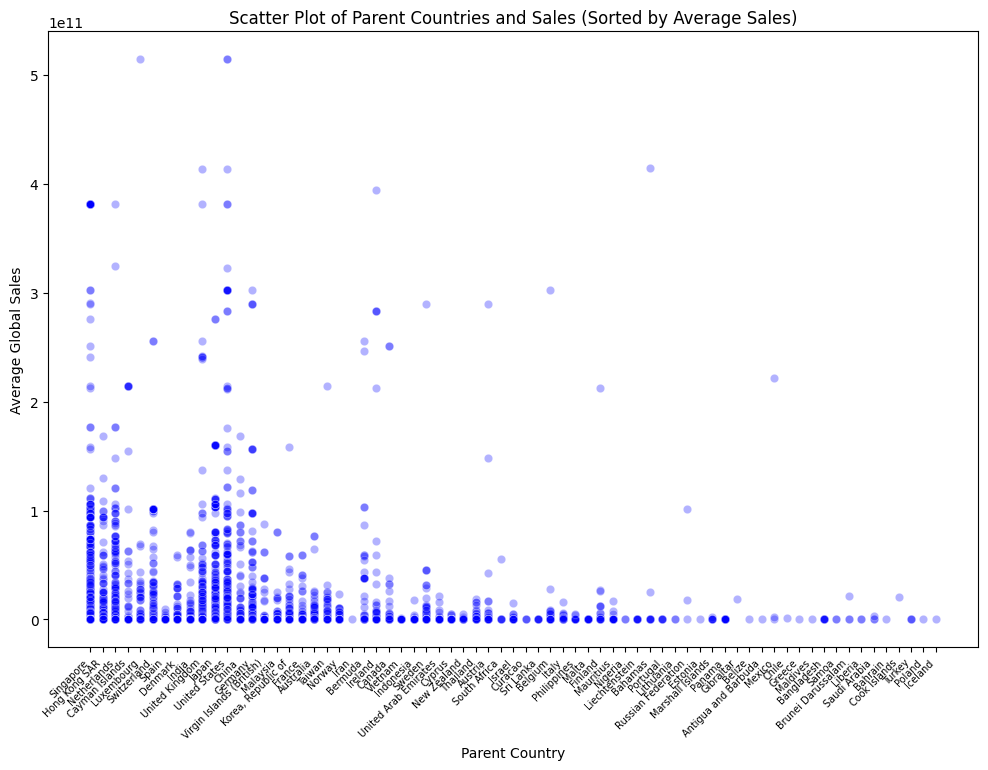

In [8]:
# Scatterplot of sales against parent country 
plt.figure(figsize=(12, 8))

avg_sales = catA_data.groupby('Parent Country')['Sales (Global Ultimate Total USD)'].mean().reset_index()

# Sort the DataFrame based on average sales
sorted_countries = avg_sales.sort_values(by='Sales (Global Ultimate Total USD)', ascending=False)

# Create a new DataFrame with sorted countries
catA_data_sorted = catA_data[catA_data['Parent Country'].isin(sorted_countries['Parent Country'])]

plt.figure(figsize=(12, 8))

# Create a scatter plot
sns.scatterplot(x='Parent Country', y='Sales (Global Ultimate Total USD)', data=catA_data_sorted, color='blue', alpha=0.3)

plt.title('Scatter Plot of Parent Countries and Sales (Sorted by Average Sales)')
plt.xlabel('Parent Country')
plt.ylabel('Average Global Sales')
plt.xticks(rotation=45, ha='right', fontsize=7)

plt.show()

We arranged the parent countries according to the average global sales generated by the companies in the country, and we observe that Singapore is in the lead. This means that the Singapore holds the greatest pivotal role and companies owned by Singapore is likely to generate high sales as compared to companies owned by Iceland.

### 2 Data Cleaning

2.1 Dropping unimportant columns

We have the following findings:

1. We can drop `AccountID`, `Year Found` as it does not provide us with relevant information on sales for the companies.

2. `SIC Code` + `Industry` provied similar information as compared to `8-Digit SIC Code` + `8-Digit SIC Description`. We will drop the `8-Digit SIC Code` and `8-Digit SIC Description` columns as our group will like to focus on the broader industry when conducting our predictive analysis. We can keep a copy of SIC Code and Industry for reference, then drop `Industry` column

3. `Company Description` provide us with similar information on the industry that the company is in, which is information we already have from `Industry`. We can drop `Company Description`

4. We can drop `Square Footage` as it is an empty column.

5. We can drop `Company Status (Active/Inactive)` as all the companies are active.

6. We can drop `Import/Export Status` and `Fiscal Year End` as it does not provide us with significant relevant information on sales and there are too many null values in the columns.

7. We can drop `Global Ultimate Company`, `Global Ultimate Country` and `Domestic Ultimate Company` as we are being representative of the corporate structure as a whole, rather than only focusing on the top-level entities

In [9]:
catA_data.drop(columns=['AccountID', 'Year Found', '8-Digit SIC Code', '8-Digit SIC Description', 'Company Description',
                        'Square Footage', 'Company Status (Active/Inactive)', 'Import/Export Status', 'Fiscal Year End',
                        'Global Ultimate Company', 'Global Ultimate Country', 'Domestic Ultimate Company'], inplace=True)
catA_data.head()

LATITUDE   LONGITUDE                                    Company  SIC Code  \
0  1.285495  103.843852  FRANK CONSULTING SERVICES PRIVATE LIMITED    7361.0   
1  1.291294  103.827476       NEW DESERT ORCHID SHIPPING PTE. LTD.    4449.0   
2  1.300144  103.857517                2MBAO BIOCELLBANK PTE. LTD.    6719.0   
3  1.300785  103.791263                         NEWBLOOM PTE. LTD.    6719.0   
4  1.298759  103.859430               ASIA GREEN CAPITAL PTE. LTD.    6719.0   

                                            Industry Entity Type  \
0                                Employment Agencies  Subsidiary   
1  Water Transportation of Freight, Not Elsewhere...  Subsidiary   
2  Offices of Holding Companies, Not Elsewhere Cl...  Subsidiary   
3  Offices of Holding Companies, Not Elsewhere Cl...  Subsidiary   
4  Offices of Holding Companies, Not Elsewhere Cl...      Parent   

                         Parent Company Parent Country Ownership Type  \
0  FRANK RECRUITMENT GROUP PRIVATE LTD.      Singapore        Private   
1          FORTITUDE SHIPPING PTE. LTD.      Singapore        Private   
2   MADISON LIGHTERS AND WATCHES CO LTD  Hong Kong SAR        Private   
3          WILMAR INTERNATIONAL LIMITED      Singapore        Private   
4          ASIA GREEN CAPITAL PTE. LTD.      Singapore        Private   

   Employees (Single Site)  Employees (Domestic Ultimate Total)  \
0                     15.0                                 25.0   
1                     39.0                                100.0   
2                      4.0                                  4.0   
3                     10.0                                100.0   
4                      NaN                                  4.0   

   Employees (Global Ultimate Total)  Sales (Domestic Ultimate Total USD)  \
0                                NaN                         2.209224e+06   
1                              100.0                         7.093536e+09   
2                                4.0                         1.026308e+06   
3                              100.0                         7.339898e+10   
4                                4.0                         4.322130e+05   

   Sales (Global Ultimate Total USD)  Is Domestic Ultimate  Is Global Ultimate  
0                       4.637871e+06                   0.0                 0.0  
1                       7.093536e+09                   0.0                 0.0  
2                       1.026308e+06                   1.0                 0.0  
3                       7.339898e+10                   0.0                 0.0  
4                       4.322130e+05                   1.0                 1.0

Our group has decided to focus on predicting sales for companies in specific industries (SIC Code), hence we will drop the following columns:

1. `LATITUDE` and `LONGITUDE`. We will rely on information provided by the Parent Company to determine if the location of companies affect their sales.

2. `Company` and `Parent Company`. They do not provide significant information when it comes to analysis in the industry-level.

In [10]:
catA_data = catA_data.drop(columns=['LATITUDE', 'LONGITUDE', 'Company', 'Parent Company'])
catA_data.head()

SIC Code                                           Industry Entity Type  \
0    7361.0                                Employment Agencies  Subsidiary   
1    4449.0  Water Transportation of Freight, Not Elsewhere...  Subsidiary   
2    6719.0  Offices of Holding Companies, Not Elsewhere Cl...  Subsidiary   
3    6719.0  Offices of Holding Companies, Not Elsewhere Cl...  Subsidiary   
4    6719.0  Offices of Holding Companies, Not Elsewhere Cl...      Parent   

  Parent Country Ownership Type  Employees (Single Site)  \
0      Singapore        Private                     15.0   
1      Singapore        Private                     39.0   
2  Hong Kong SAR        Private                      4.0   
3      Singapore        Private                     10.0   
4      Singapore        Private                      NaN   

   Employees (Domestic Ultimate Total)  Employees (Global Ultimate Total)  \
0                                 25.0                                NaN   
1                                100.0                              100.0   
2                                  4.0                                4.0   
3                                100.0                              100.0   
4                                  4.0                                4.0   

   Sales (Domestic Ultimate Total USD)  Sales (Global Ultimate Total USD)  \
0                         2.209224e+06                       4.637871e+06   
1                         7.093536e+09                       7.093536e+09   
2                         1.026308e+06                       1.026308e+06   
3                         7.339898e+10                       7.339898e+10   
4                         4.322130e+05                       4.322130e+05   

   Is Domestic Ultimate  Is Global Ultimate  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   1.0                 0.0  
3                   0.0                 0.0  
4                   1.0                 1.0

2.2 Feature Engineering and Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
print(catA_data.columns)

Index(['SIC Code', 'Industry', 'Entity Type', 'Parent Country',
       'Ownership Type', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Domestic Ultimate Total USD)',
       'Sales (Global Ultimate Total USD)', 'Is Domestic Ultimate',
       'Is Global Ultimate'],
      dtype='object')


Rewriting the employees column

In [13]:
# Employees for each company

# Replace empty cells in 'Employees (Domestic Ultimate Total)' and 'Employees (Global Ultimate Total)' with 0
catA_data['Employees (Domestic Ultimate Total)'].fillna(0, inplace=True)
catA_data['Employees (Global Ultimate Total)'].fillna(0, inplace=True)

# Create a new column for the summed total of employees
catA_data['Total Employees'] = catA_data['Employees (Domestic Ultimate Total)'] + catA_data['Employees (Global Ultimate Total)']

# Identify and drop rows where 'Employees (Single Site)' is more than the summed total
anomalous_rows = catA_data[catA_data['Employees (Single Site)'] > catA_data['Total Employees']]
catA_data = catA_data.drop(anomalous_rows.index)

In [14]:
# Drop unnecessary employee-related columns
catA_data.drop(columns=['Employees (Single Site)', 'Employees (Domestic Ultimate Total)', 'Employees (Global Ultimate Total)'], inplace=True)

Scaling columns by standard scaling

In [15]:
# Standard Scaling 
columns_to_scale = ['SIC Code']
scaler = StandardScaler()
catA_data[columns_to_scale] = scaler.fit_transform(catA_data[columns_to_scale])

# Scale 'Total Employees' column
catA_data['Total Employees'] = scaler.fit_transform(catA_data[['Total Employees']])

# Display the first few rows of the modified DataFrame
catA_data.head()

SIC Code                                           Industry Entity Type  \
0  0.697514                                Employment Agencies  Subsidiary   
1 -1.022577  Water Transportation of Freight, Not Elsewhere...  Subsidiary   
2  0.318291  Offices of Holding Companies, Not Elsewhere Cl...  Subsidiary   
3  0.318291  Offices of Holding Companies, Not Elsewhere Cl...  Subsidiary   
4  0.318291  Offices of Holding Companies, Not Elsewhere Cl...      Parent   

  Parent Country Ownership Type  Sales (Domestic Ultimate Total USD)  \
0      Singapore        Private                         2.209224e+06   
1      Singapore        Private                         7.093536e+09   
2  Hong Kong SAR        Private                         1.026308e+06   
3      Singapore        Private                         7.339898e+10   
4      Singapore        Private                         4.322130e+05   

   Sales (Global Ultimate Total USD)  Is Domestic Ultimate  \
0                       4.637871e+06                   0.0   
1                       7.093536e+09                   0.0   
2                       1.026308e+06                   1.0   
3                       7.339898e+10                   0.0   
4                       4.322130e+05                   1.0   

   Is Global Ultimate  Total Employees  
0                 0.0        -0.161686  
1                 0.0        -0.157945  
2                 0.0        -0.162050  
3                 0.0        -0.157945  
4                 1.0        -0.162050

In [16]:
# Keep a copy of SIC Code and Industry for reference 
industry_code = catA_data[['SIC Code', 'Industry']]
industry_code.head()

SIC Code                                           Industry
0  0.697514                                Employment Agencies
1 -1.022577  Water Transportation of Freight, Not Elsewhere...
2  0.318291  Offices of Holding Companies, Not Elsewhere Cl...
3  0.318291  Offices of Holding Companies, Not Elsewhere Cl...
4  0.318291  Offices of Holding Companies, Not Elsewhere Cl...

In [17]:
catA_data = catA_data.drop(columns='Industry')
catA_data.head()

SIC Code Entity Type Parent Country Ownership Type  \
0  0.697514  Subsidiary      Singapore        Private   
1 -1.022577  Subsidiary      Singapore        Private   
2  0.318291  Subsidiary  Hong Kong SAR        Private   
3  0.318291  Subsidiary      Singapore        Private   
4  0.318291      Parent      Singapore        Private   

   Sales (Domestic Ultimate Total USD)  Sales (Global Ultimate Total USD)  \
0                         2.209224e+06                       4.637871e+06   
1                         7.093536e+09                       7.093536e+09   
2                         1.026308e+06                       1.026308e+06   
3                         7.339898e+10                       7.339898e+10   
4                         4.322130e+05                       4.322130e+05   

   Is Domestic Ultimate  Is Global Ultimate  Total Employees  
0                   0.0                 0.0        -0.161686  
1                   0.0                 0.0        -0.157945  
2                   1.0                 0.0        -0.162050  
3                   0.0                 0.0        -0.157945  
4                   1.0                 1.0        -0.162050

2.3 Checking for duplicates

In [18]:
print(len(catA_data))
catA_cleaned = catA_data.drop_duplicates(keep='first').copy()
print(len(catA_cleaned))

24868
15872


2.4 One-hot encoding

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
cat_features = catA_cleaned.select_dtypes(include=['object']).columns
cat_indices = [catA_cleaned.columns.get_loc(col) for col in catA_cleaned.select_dtypes(include=['object']).columns]

preprocessor_onehot = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), cat_indices)],
    remainder='passthrough'
)

X_transformed_train = preprocessor_onehot.fit_transform(catA_cleaned)

transformed_feature_names = (preprocessor_onehot.named_transformers_['cat'].get_feature_names_out(input_features=cat_features)).tolist() + [col for col in catA_cleaned.columns if col not in cat_features]
# Get the indices of the one-hot encoded columns for SMOTENC
# As the data contains both categorical and numerical features, we need to specify the categorical features for SMOTENC
onehot_indices = [i for i, name in enumerate(transformed_feature_names) if name.startswith(tuple(cat_features))]

catA_data_onehot = pd.DataFrame(preprocessor_onehot.fit_transform(catA_cleaned).toarray(), columns=transformed_feature_names)

catA_data_onehot.head()

Entity Type_Branch  Entity Type_Independent  Entity Type_Parent  \
0                 0.0                      0.0                 0.0   
1                 0.0                      0.0                 0.0   
2                 0.0                      0.0                 0.0   
3                 0.0                      0.0                 0.0   
4                 0.0                      0.0                 1.0   

   Entity Type_Subsidiary  Parent Country_Antigua and Barbuda  \
0                     1.0                                 0.0   
1                     1.0                                 0.0   
2                     1.0                                 0.0   
3                     1.0                                 0.0   
4                     0.0                                 0.0   

   Parent Country_Australia  Parent Country_Austria  Parent Country_Bahamas  \
0                       0.0                     0.0                     0.0   
1                       0.0                     0.0                     0.0   
2                       0.0                     0.0                     0.0   
3                       0.0                     0.0                     0.0   
4                       0.0                     0.0                     0.0   

   Parent Country_Bahrain  Parent Country_Bangladesh  ...  \
0                     0.0                        0.0  ...   
1                     0.0                        0.0  ...   
2                     0.0                        0.0  ...   
3                     0.0                        0.0  ...   
4                     0.0                        0.0  ...   

   Ownership Type_Partnership  Ownership Type_Private  Ownership Type_Public  \
0                         0.0                     1.0                    0.0   
1                         0.0                     1.0                    0.0   
2                         0.0                     1.0                    0.0   
3                         0.0                     1.0                    0.0   
4                         0.0                     1.0                    0.0   

   Ownership Type_Public Sector  SIC Code  \
0                           0.0  0.697514   
1                           0.0 -1.022577   
2                           0.0  0.318291   
3                           0.0  0.318291   
4                           0.0  0.318291   

   Sales (Domestic Ultimate Total USD)  Sales (Global Ultimate Total USD)  \
0                         2.209224e+06                       4.637871e+06   
1                         7.093536e+09                       7.093536e+09   
2                         1.026308e+06                       1.026308e+06   
3                         7.339898e+10                       7.339898e+10   
4                         4.322130e+05                       4.322130e+05   

   Is Domestic Ultimate  Is Global Ultimate  Total Employees  
0                   0.0                 0.0        -0.161686  
1                   0.0                 0.0        -0.157945  
2                   1.0                 0.0        -0.162050  
3                   0.0                 0.0        -0.157945  
4                   1.0                 1.0        -0.162050  

[5 rows x 86 columns]

### 3 Training set and Test set split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = catA_data_onehot.drop(['Sales (Domestic Ultimate Total USD)', 'Sales (Global Ultimate Total USD)'], axis=1)
Ydom = catA_data_onehot['Sales (Domestic Ultimate Total USD)']
Yglobal = catA_data_onehot['Sales (Global Ultimate Total USD)']

In [23]:
Xdom_train, Xdom_test, Ydom_train, Ydom_test = train_test_split(X, Ydom, test_size=0.2, random_state = 8)
Xglobal_train, Xglobal_test, Yglobal_train, Yglobal_test = train_test_split(X, Yglobal, test_size=0.2, random_state = 8)

### 4 Evaluation Metric

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

In [25]:
kf = StratifiedKFold(n_splits=5, shuffle=False)
r2_scorer = make_scorer(r2_score)

In [26]:
scoring_table = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'Adjusted_R2'])

# Add regression scoring functions
def model_evaluation_regression(regressor, param_grid, scoring_table, model_name, X_train_encoded, y_train, X_test_encoded, y_test):
    # training the model
    grid_search = GridSearchCV(regressor, param_grid, cv=kf, scoring=r2_scorer, n_jobs=-1)
    grid_search.fit(X_train_encoded, y_train)

    # fit the model with the test set using the best parameters
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train_encoded)
    y_pred = best_model.predict(X_test_encoded)

    # evaluating the model using the test set
    # calculate mean squared error
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)

    # calculate mean absolute error
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # calculate R-squared
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)

    # calculate adjusted R-squared
    n_train, k_train = X_train_encoded.shape[0], X_train_encoded.shape[1]
    n_test, k_test = X_test_encoded.shape[0], X_test_encoded.shape[1]

    adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))
    adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))

    # record the performance of the model
    scoring_table = pd.concat([scoring_table, pd.DataFrame({
        'Model': model_name + '_train',
        'MSE': mse_train,
        'MAE': mae_train,
        'R2': r2_train,
        'Adjusted_R2': adj_r2_train,
    }, index=[0])])

    scoring_table = pd.concat([scoring_table, pd.DataFrame({
        'Model': model_name + '_test',
        'MSE': mse_test,
        'MAE': mae_test,
        'R2': r2_test,
        'Adjusted_R2': adj_r2_test,
    }, index=[0])])

    return scoring_table

### 5 K-Nearest Neighbours

K-nearest neighbours is a supervised learning algorithm which can be used for regression to forecast future sales figures for companies. It works by finding the k nearest data points to a given data point in the feature space, and calculates the weighted average of the target variable for these nearest neighbours. As KNN is a distance-based algorithm, it is very essential to ensure our features are scaled as all features are included in the distance calculation. We have also ensured one-hot encoding is done as the categorical variables have been converted to numerical form.

In [27]:
# Importing necessary libraries for KNN
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

To find the optimal k, we have used cross-validation.

In [28]:
knn = KNeighborsRegressor()

In [29]:
# Function to perform KNN regression with grid search for best n_neighbors
def knn_evaluation_regression(regressor, param_grid, scoring_table, model_name, X_train_encoded, y_train, X_test_encoded, y_test):
    # training the model
    grid_search = GridSearchCV(regressor, param_grid, cv=kf, scoring=r2_scorer, n_jobs=-1)
    grid_search.fit(X_train_encoded, y_train)

    # fit the model with the test set using the best parameters
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train_encoded)
    y_pred = best_model.predict(X_test_encoded)

    # evaluating the model using the test set
    # calculate mean squared error
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)

    # calculate mean absolute error
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # calculate R-squared
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)

    # calculate adjusted R-squared
    n_train, k_train = X_train_encoded.shape[0], X_train_encoded.shape[1]
    n_test, k_test = X_test_encoded.shape[0], X_test_encoded.shape[1]

    adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))
    adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))

    # record the performance of the model
    scoring_table = pd.concat([scoring_table, pd.DataFrame({
        'Model': model_name + '_train',
        'Best_n': grid_search.best_params_['n_neighbors'],
        'MSE': mse_train,
        'MAE': mae_train,
        'R2': r2_train,
        'Adjusted_R2': adj_r2_train,
    }, index=[0])])

    scoring_table = pd.concat([scoring_table, pd.DataFrame({
        'Model': model_name + '_test',
        'Best_n': grid_search.best_params_['n_neighbors'],
        'MSE': mse_test,
        'MAE': mae_test,
        'R2': r2_test,
        'Adjusted_R2': adj_r2_test,
    }, index=[0])])

    return scoring_table

We created 2 different scoring tables to distinguish out the domestic and global sales outcomes.

In [30]:
# Create an empty scoring table for both Domestic and Global Sales
scoring_table_knndom = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'Adjusted_R2', 'Best_n'])
scoring_table_knnglobal = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'Adjusted_R2', 'Best_n'])

Applying the regression method to evaluate our model's performance

In [31]:
# Retrieve 'Domestic Sales' column for training and testing sets
Ydom_train = catA_data_onehot.loc[Ydom_train.index, 'Sales (Domestic Ultimate Total USD)']
Ydom_test = catA_data_onehot.loc[Ydom_test.index, 'Sales (Domestic Ultimate Total USD)']

# Retrieve 'Global Sales' column for training and testing sets
Yglobal_train = catA_data_onehot.loc[Yglobal_train.index, 'Sales (Global Ultimate Total USD)']
Yglobal_test = catA_data_onehot.loc[Yglobal_test.index, 'Sales (Global Ultimate Total USD)']

# Combine the labels from both training and test sets to fit the encoder
all_labels_domestic = pd.concat([Ydom_train, Ydom_test])
all_labels_global = pd.concat([Yglobal_train, Yglobal_test])

# Use OrdinalEncoder for both training and test sets
ordinal_encoder_domestic = OrdinalEncoder()
Ydom_all_classes = ordinal_encoder_domestic.fit_transform(all_labels_domestic.values.reshape(-1, 1))
# Transform test set
Ydom_test_classes = ordinal_encoder_domestic.transform(Ydom_test.values.reshape(-1, 1))

ordinal_encoder_global = OrdinalEncoder()
Yglobal_all_classes = ordinal_encoder_global.fit_transform(all_labels_global.values.reshape(-1, 1))
# Transform test set
Yglobal_test_classes = ordinal_encoder_global.transform(Yglobal_test.values.reshape(-1, 1))

# Flatten the arrays to handle the shape difference
Ydom_all_classes = Ydom_all_classes.flatten()
Ydom_test_classes = Ydom_test_classes.flatten()

Yglobal_all_classes = Yglobal_all_classes.flatten()
Yglobal_test_classes = Yglobal_test_classes.flatten()

# Split the combined classes back into training and test sets
Ydom_train_classes = Ydom_all_classes[:len(Ydom_train)]
Yglobal_train_classes = Yglobal_all_classes[:len(Yglobal_train)]

5.1 Domestic Sales

Experimenting with the optimal number of neighbours for domestic sales, starting with a big range

In [32]:
param_grid_knn1 = {'n_neighbors': [1, 5, 10, 20, 30, 40]}

In [33]:
scoring_table_knndom = knn_evaluation_regression(knn, param_grid_knn1, scoring_table_knndom, 'knn_dom1', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_knndom

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


/var/folders/yk/rjbvhtb15ts24mbrqtq665zr0000gn/T/ipykernel_6144/1725139504.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scoring_table = pd.concat([scoring_table, pd.DataFrame({


Model           MSE          MAE        R2  Adjusted_R2 Best_n
0  knn_dom1_train  4.006971e+06  1642.394010  0.328334     0.323860     20
0   knn_dom1_test  4.429046e+06  1725.134929  0.261855     0.241789     20

As the best_n is 20, we narrow down the intervals and range and try again

In [34]:
param_grid_knn2 = {'n_neighbors': [12, 14, 16, 18, 20, 22, 24, 26, 28]}

scoring_table_knndom = knn_evaluation_regression(knn, param_grid_knn2, scoring_table_knndom, 'knn_dom2', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_knndom

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model           MSE          MAE        R2  Adjusted_R2 Best_n
0  knn_dom1_train  4.006971e+06  1642.394010  0.328334     0.323860     20
0   knn_dom1_test  4.429046e+06  1725.134929  0.261855     0.241789     20
0  knn_dom2_train  3.727170e+06  1567.131153  0.375235     0.371074     12
0   knn_dom2_test  4.432956e+06  1703.767008  0.261203     0.241120     12

Since best_n is 12, we narrow down the range even more to find the exact best_n

In [35]:
param_grid_knn3 = {'n_neighbors': [10, 11, 12, 13, 14]}

scoring_table_knndom = knn_evaluation_regression(knn, param_grid_knn3, scoring_table_knndom, 'knn_dom3', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_knndom

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model           MSE          MAE        R2  Adjusted_R2 Best_n
0  knn_dom1_train  4.006971e+06  1642.394010  0.328334     0.323860     20
0   knn_dom1_test  4.429046e+06  1725.134929  0.261855     0.241789     20
0  knn_dom2_train  3.727170e+06  1567.131153  0.375235     0.371074     12
0   knn_dom2_test  4.432956e+06  1703.767008  0.261203     0.241120     12
0  knn_dom3_train  3.680983e+06  1555.198930  0.382977     0.378868     11
0   knn_dom3_test  4.433696e+06  1700.070236  0.261080     0.240993     11

5.2 Global sales

Doing the same experimentation with global sales

In [36]:
param_grid_knn1g = {'n_neighbors': [1, 5, 10, 20, 30, 40]}

scoring_table_knnglobal = knn_evaluation_regression(knn, param_grid_knn1g, scoring_table_knnglobal, 'knn_global', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_knnglobal

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/var/folders/yk/rjbvhtb15ts24mbrqtq665zr0000gn/T/ipykernel_6144/1725139504.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scoring_table = pd.concat([scoring_table, pd.DataFrame({


Model           MSE          MAE        R2  Adjusted_R2 Best_n
0  knn_global_train  2.267988e+06  1120.568725  0.570895     0.568037     10
0   knn_global_test  2.813489e+06  1247.100976  0.468733     0.454291     10

As best_n = 10, we explore the values around 10

In [37]:
param_grid_knn2g = {'n_neighbors': [5, 7, 9, 10, 12, 14, 16, 18, 20]}

scoring_table_knnglobal = knn_evaluation_regression(knn, param_grid_knn2g, scoring_table_knnglobal, 'knn_global2', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_knnglobal

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model           MSE          MAE        R2  Adjusted_R2 Best_n
0   knn_global_train  2.267988e+06  1120.568725  0.570895     0.568037     10
0    knn_global_test  2.813489e+06  1247.100976  0.468733     0.454291     10
0  knn_global2_train  2.220430e+06  1105.627042  0.579893     0.577095      9
0   knn_global2_test  2.818319e+06  1243.037865  0.467821     0.453354      9

Since the new best_n is 9, we narrow down and make sure we get the exact best number of neighbours

In [38]:
param_grid_knn3g = {'n_neighbors': [7, 8, 9, 10]}

scoring_table_knnglobal = knn_evaluation_regression(knn, param_grid_knn3g, scoring_table_knnglobal, 'knn_global3', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_knnglobal

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model           MSE          MAE        R2  Adjusted_R2 Best_n
0   knn_global_train  2.267988e+06  1120.568725  0.570895     0.568037     10
0    knn_global_test  2.813489e+06  1247.100976  0.468733     0.454291     10
0  knn_global2_train  2.220430e+06  1105.627042  0.579893     0.577095      9
0   knn_global2_test  2.818319e+06  1243.037865  0.467821     0.453354      9
0  knn_global3_train  2.220430e+06  1105.627042  0.579893     0.577095      9
0   knn_global3_test  2.818319e+06  1243.037865  0.467821     0.453354      9

From our model's performance evaluation, the performance of the model has converged. We can see that for domestic sales, the best number of neighbours is 12, giving us an R2 score of 0.261185, whereas for global sales, the best number of neighbours is 9, giving us an R2 score of 0.468424.

However, the MSE and MAE of the model are high There is quite significant error between observed and predicted values in the model, so perhaps there are other models can do better in this aspect. 
Ultimately, we are finding the best model holistically that can provide accurate sales forecasts, enabling companies to make informed strategic decisions, optimize inventory management, and allocate resources effectively.

### 6 Support Vector Regressor (SVR)

6.1 SVR with linear kernel

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [40]:
svr_linear =  SVR(kernel='linear')

In [41]:
scoring_table_svrl = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'Adjusted_R2'])

# Add regression scoring functions
def model_evaluation_linear(regressor, param_grid, scoring_table, model_name, X_train_encoded, y_train, X_test_encoded, y_test):
    # training the model
    grid_search = GridSearchCV(regressor, param_grid, cv=kf, scoring=r2_scorer, n_jobs=-1)
    grid_search.fit(X_train_encoded, y_train)

    # fit the model with the test set using the best parameters
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train_encoded)
    y_pred = best_model.predict(X_test_encoded)

    # evaluating the model using the test set
    # calculate mean squared error
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)

    # calculate mean absolute error
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # calculate R-squared
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)

    # calculate adjusted R-squared
    n_train, k_train = X_train_encoded.shape[0], X_train_encoded.shape[1]
    n_test, k_test = X_test_encoded.shape[0], X_test_encoded.shape[1]

    adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))
    adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))

    # record the performance of the model
    scoring_table = pd.concat([scoring_table, pd.DataFrame({
        'Model': model_name + '_train',
        'Best_iteration': grid_search.best_params_['max_iter'], 
        'Best_C': grid_search.best_params_['C'],
        'MSE': mse_train,
        'MAE': mae_train,
        'R2': r2_train,
        'Adjusted_R2': adj_r2_train,
    }, index=[0])])

    scoring_table = pd.concat([scoring_table, pd.DataFrame({
        'Model': model_name + '_test',
        'Best_iteration': grid_search.best_params_['max_iter'], 
        'Best_C': grid_search.best_params_['C'],
        'MSE': mse_test,
        'MAE': mae_test,
        'R2': r2_test,
        'Adjusted_R2': adj_r2_test,
    }, index=[0])])

    return scoring_table

6.1.1 Domestic Sales

In [42]:
param_grid_svrl1 = {
    'max_iter': [5, 10, 100, 1000, 1500], 
    'C': [0.01, 0.1, 1.0, 10.0, 100.0]  
}

scoring_table_svrl = model_evaluation_linear(svr_linear, param_grid_svrl1, scoring_table_svrl, 'svr_linear_dom', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_svrl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/F

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

Model           MSE          MAE        R2  Adjusted_R2  \
0  svr_linear_dom_train  5.890706e+06  2129.997146  0.012574     0.005997   
0   svr_linear_dom_test  5.924953e+06  2135.172649  0.012547    -0.014296   

   Best_iteration  Best_C  
0            10.0   100.0  
0            10.0   100.0

In [43]:
param_grid_svrl2 = {
    'max_iter': [5, 10, 30, 50, 70, 90], 
    'C': [10, 30, 50, 90, 100, 150, 200]  
}

scoring_table_svrl = model_evaluation_linear(svr_linear, param_grid_svrl2, scoring_table_svrl, 'svr_linear_dom2', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_svrl


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/F

Model           MSE          MAE        R2  Adjusted_R2  \
0   svr_linear_dom_train  5.890706e+06  2129.997146  0.012574     0.005997   
0    svr_linear_dom_test  5.924953e+06  2135.172649  0.012547    -0.014296   
0  svr_linear_dom2_train  5.915985e+06  2134.475560  0.008336     0.001731   
0   svr_linear_dom2_test  5.949728e+06  2139.082875  0.008418    -0.018538   

   Best_iteration  Best_C  
0            10.0   100.0  
0            10.0   100.0  
0            90.0    30.0  
0            90.0    30.0

In [44]:
param_grid_svrl3 = {
    'max_iter': [50, 60, 70, 80, 90, 100], 
    'C': [10, 15, 20, 25, 30, 35, 40, 45, 50]  
}

scoring_table_svrl = model_evaluation_linear(svr_linear, param_grid_svrl3, scoring_table_svrl, 'svr_linear_dom3', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_svrl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

Model           MSE          MAE        R2  Adjusted_R2  \
0   svr_linear_dom_train  5.890706e+06  2129.997146  0.012574     0.005997   
0    svr_linear_dom_test  5.924953e+06  2135.172649  0.012547    -0.014296   
0  svr_linear_dom2_train  5.915985e+06  2134.475560  0.008336     0.001731   
0   svr_linear_dom2_test  5.949728e+06  2139.082875  0.008418    -0.018538   
0  svr_linear_dom3_train  5.912431e+06  2133.846727  0.008932     0.002331   
0   svr_linear_dom3_test  5.946881e+06  2138.389654  0.008893    -0.018050   

   Best_iteration  Best_C  
0            10.0   100.0  
0            10.0   100.0  
0            90.0    30.0  
0            90.0    30.0  
0            90.0    45.0  
0            90.0    45.0

In [45]:
param_grid_svrl4 = {
    'max_iter': [80, 85, 90, 95, 100], 
    'C': [40, 41, 42, 42, 43, 44, 45, 46, 47, 48, 49, 50]  
}

scoring_table_svrl = model_evaluation_linear(svr_linear, param_grid_svrl4, scoring_table_svrl, 'svr_linear_dom4', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_svrl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=80).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=80).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=80).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=80).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

Model           MSE          MAE        R2  Adjusted_R2  \
0   svr_linear_dom_train  5.890706e+06  2129.997146  0.012574     0.005997   
0    svr_linear_dom_test  5.924953e+06  2135.172649  0.012547    -0.014296   
0  svr_linear_dom2_train  5.915985e+06  2134.475560  0.008336     0.001731   
0   svr_linear_dom2_test  5.949728e+06  2139.082875  0.008418    -0.018538   
0  svr_linear_dom3_train  5.912431e+06  2133.846727  0.008932     0.002331   
0   svr_linear_dom3_test  5.946881e+06  2138.389654  0.008893    -0.018050   
0  svr_linear_dom4_train  5.914879e+06  2134.242432  0.008522     0.001918   
0   svr_linear_dom4_test  5.949392e+06  2138.818611  0.008474    -0.018480   

   Best_iteration  Best_C  
0            10.0   100.0  
0            10.0   100.0  
0            90.0    30.0  
0            90.0    30.0  
0            90.0    45.0  
0            90.0    45.0  
0            90.0    43.0  
0            90.0    43.0

6.1.2 Global Sales

In [46]:
param_grid_svrl1g = {
    'max_iter': [10, 100, 1000, 1500], 
    'C': [0.01, 0.1, 1.0, 10.0, 100.0]  
}

scoring_table_svrl = model_evaluation_linear(svr_linear, param_grid_svrl1g, scoring_table_svrl, 'svr_linear_global', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_svrl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
 

Model           MSE          MAE        R2  Adjusted_R2  \
0     svr_linear_dom_train  5.890706e+06  2129.997146  0.012574     0.005997   
0      svr_linear_dom_test  5.924953e+06  2135.172649  0.012547    -0.014296   
0    svr_linear_dom2_train  5.915985e+06  2134.475560  0.008336     0.001731   
0     svr_linear_dom2_test  5.949728e+06  2139.082875  0.008418    -0.018538   
0    svr_linear_dom3_train  5.912431e+06  2133.846727  0.008932     0.002331   
0     svr_linear_dom3_test  5.946881e+06  2138.389654  0.008893    -0.018050   
0    svr_linear_dom4_train  5.914879e+06  2134.242432  0.008522     0.001918   
0     svr_linear_dom4_test  5.949392e+06  2138.818611  0.008474    -0.018480   
0  svr_linear_global_train  5.168006e+06  1989.768973  0.022209     0.015697   
0   svr_linear_global_test  5.182496e+06  1995.285857  0.021397    -0.005206   

   Best_iteration  Best_C  
0            10.0   100.0  
0            10.0   100.0  
0            90.0    30.0  
0            90.0    30.0  
0            90.0    45.0  
0            90.0    45.0  
0            90.0    43.0  
0            90.0    43.0  
0          1500.0     0.1  
0          1500.0     0.1

In [47]:
param_grid_svrl2g = {
    'max_iter': [1000, 1300, 1500, 2000, 2500, 3000], 
    'C': [0.05, 0.1, 0.5, 1.0]  
}

scoring_table_svrl = model_evaluation_linear(svr_linear, param_grid_svrl2g, scoring_table_svrl, 'svr_linear_global2', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_svrl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/

Model           MSE          MAE        R2  Adjusted_R2  \
0      svr_linear_dom_train  5.890706e+06  2129.997146  0.012574     0.005997   
0       svr_linear_dom_test  5.924953e+06  2135.172649  0.012547    -0.014296   
0     svr_linear_dom2_train  5.915985e+06  2134.475560  0.008336     0.001731   
0      svr_linear_dom2_test  5.949728e+06  2139.082875  0.008418    -0.018538   
0     svr_linear_dom3_train  5.912431e+06  2133.846727  0.008932     0.002331   
0      svr_linear_dom3_test  5.946881e+06  2138.389654  0.008893    -0.018050   
0     svr_linear_dom4_train  5.914879e+06  2134.242432  0.008522     0.001918   
0      svr_linear_dom4_test  5.949392e+06  2138.818611  0.008474    -0.018480   
0   svr_linear_global_train  5.168006e+06  1989.768973  0.022209     0.015697   
0    svr_linear_global_test  5.182496e+06  1995.285857  0.021397    -0.005206   
0  svr_linear_global2_train  5.168006e+06  1989.768973  0.022209     0.015697   
0   svr_linear_global2_test  5.182496e+06  1995.285857  0.021397    -0.005206   

   Best_iteration  Best_C  
0            10.0   100.0  
0            10.0   100.0  
0            90.0    30.0  
0            90.0    30.0  
0            90.0    45.0  
0            90.0    45.0  
0            90.0    43.0  
0            90.0    43.0  
0          1500.0     0.1  
0          1500.0     0.1  
0          1500.0     0.1  
0          1500.0     0.1

In [48]:
param_grid_svrl3g = {
    'max_iter': [1350, 1400, 1450, 1500, 1550, 2000], 
    'C': [0.05, 0.07, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5]  
}

scoring_table_svrl = model_evaluation_linear(svr_linear, param_grid_svrl3g, scoring_table_svrl, 'svr_linear_global3', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_svrl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1350).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1350).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1350).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/

Model           MSE          MAE        R2  Adjusted_R2  \
0      svr_linear_dom_train  5.890706e+06  2129.997146  0.012574     0.005997   
0       svr_linear_dom_test  5.924953e+06  2135.172649  0.012547    -0.014296   
0     svr_linear_dom2_train  5.915985e+06  2134.475560  0.008336     0.001731   
0      svr_linear_dom2_test  5.949728e+06  2139.082875  0.008418    -0.018538   
0     svr_linear_dom3_train  5.912431e+06  2133.846727  0.008932     0.002331   
0      svr_linear_dom3_test  5.946881e+06  2138.389654  0.008893    -0.018050   
0     svr_linear_dom4_train  5.914879e+06  2134.242432  0.008522     0.001918   
0      svr_linear_dom4_test  5.949392e+06  2138.818611  0.008474    -0.018480   
0   svr_linear_global_train  5.168006e+06  1989.768973  0.022209     0.015697   
0    svr_linear_global_test  5.182496e+06  1995.285857  0.021397    -0.005206   
0  svr_linear_global2_train  5.168006e+06  1989.768973  0.022209     0.015697   
0   svr_linear_global2_test  5.182496e+06  1995.285857  0.021397    -0.005206   
0  svr_linear_global3_train  5.107611e+06  1980.221750  0.033636     0.027200   
0   svr_linear_global3_test  5.106381e+06  1983.601475  0.035769     0.009557   

   Best_iteration  Best_C  
0            10.0   100.0  
0            10.0   100.0  
0            90.0    30.0  
0            90.0    30.0  
0            90.0    45.0  
0            90.0    45.0  
0            90.0    43.0  
0            90.0    43.0  
0          1500.0     0.1  
0          1500.0     0.1  
0          1500.0     0.1  
0          1500.0     0.1  
0          1350.0     0.2  
0          1350.0     0.2

In [49]:
param_grid_svrl4g = {
    'max_iter': [1310, 1320, 1330, 1340, 1350, 1360, 1370, 1380, 1390], 
    'C': [0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28]  
}

scoring_table_svrl = model_evaluation_linear(svr_linear, param_grid_svrl4g, scoring_table_svrl, 'svr_linear_global4', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_svrl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1320).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1310).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1320).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/

Model           MSE          MAE        R2  Adjusted_R2  \
0      svr_linear_dom_train  5.890706e+06  2129.997146  0.012574     0.005997   
0       svr_linear_dom_test  5.924953e+06  2135.172649  0.012547    -0.014296   
0     svr_linear_dom2_train  5.915985e+06  2134.475560  0.008336     0.001731   
0      svr_linear_dom2_test  5.949728e+06  2139.082875  0.008418    -0.018538   
0     svr_linear_dom3_train  5.912431e+06  2133.846727  0.008932     0.002331   
0      svr_linear_dom3_test  5.946881e+06  2138.389654  0.008893    -0.018050   
0     svr_linear_dom4_train  5.914879e+06  2134.242432  0.008522     0.001918   
0      svr_linear_dom4_test  5.949392e+06  2138.818611  0.008474    -0.018480   
0   svr_linear_global_train  5.168006e+06  1989.768973  0.022209     0.015697   
0    svr_linear_global_test  5.182496e+06  1995.285857  0.021397    -0.005206   
0  svr_linear_global2_train  5.168006e+06  1989.768973  0.022209     0.015697   
0   svr_linear_global2_test  5.182496e+06  1995.285857  0.021397    -0.005206   
0  svr_linear_global3_train  5.107611e+06  1980.221750  0.033636     0.027200   
0   svr_linear_global3_test  5.106381e+06  1983.601475  0.035769     0.009557   
0  svr_linear_global4_train  5.077369e+06  1974.486577  0.039358     0.032960   
0   svr_linear_global4_test  5.067621e+06  1976.845245  0.043088     0.017075   

   Best_iteration  Best_C  
0            10.0  100.00  
0            10.0  100.00  
0            90.0   30.00  
0            90.0   30.00  
0            90.0   45.00  
0            90.0   45.00  
0            90.0   43.00  
0            90.0   43.00  
0          1500.0    0.10  
0          1500.0    0.10  
0          1500.0    0.10  
0          1500.0    0.10  
0          1350.0    0.20  
0          1350.0    0.20  
0          1310.0    0.28  
0          1310.0    0.28

In [50]:
param_grid_svrl5g = {
    'max_iter': [1305, 1310, 1315, 1320], 
    'C': [0.26, 0.27, 0.28, 0.29]  
}

scoring_table_svrl = model_evaluation_linear(svr_linear, param_grid_svrl5g, scoring_table_svrl, 'svr_linear_global5', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_svrl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1305).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1305).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1305).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/

Model           MSE          MAE        R2  Adjusted_R2  \
0      svr_linear_dom_train  5.890706e+06  2129.997146  0.012574     0.005997   
0       svr_linear_dom_test  5.924953e+06  2135.172649  0.012547    -0.014296   
0     svr_linear_dom2_train  5.915985e+06  2134.475560  0.008336     0.001731   
0      svr_linear_dom2_test  5.949728e+06  2139.082875  0.008418    -0.018538   
0     svr_linear_dom3_train  5.912431e+06  2133.846727  0.008932     0.002331   
0      svr_linear_dom3_test  5.946881e+06  2138.389654  0.008893    -0.018050   
0     svr_linear_dom4_train  5.914879e+06  2134.242432  0.008522     0.001918   
0      svr_linear_dom4_test  5.949392e+06  2138.818611  0.008474    -0.018480   
0   svr_linear_global_train  5.168006e+06  1989.768973  0.022209     0.015697   
0    svr_linear_global_test  5.182496e+06  1995.285857  0.021397    -0.005206   
0  svr_linear_global2_train  5.168006e+06  1989.768973  0.022209     0.015697   
0   svr_linear_global2_test  5.182496e+06  1995.285857  0.021397    -0.005206   
0  svr_linear_global3_train  5.107611e+06  1980.221750  0.033636     0.027200   
0   svr_linear_global3_test  5.106381e+06  1983.601475  0.035769     0.009557   
0  svr_linear_global4_train  5.077369e+06  1974.486577  0.039358     0.032960   
0   svr_linear_global4_test  5.067621e+06  1976.845245  0.043088     0.017075   
0  svr_linear_global5_train  5.072357e+06  1973.330524  0.040306     0.033914   
0   svr_linear_global5_test  5.061225e+06  1975.560185  0.044296     0.018316   

   Best_iteration  Best_C  
0            10.0  100.00  
0            10.0  100.00  
0            90.0   30.00  
0            90.0   30.00  
0            90.0   45.00  
0            90.0   45.00  
0            90.0   43.00  
0            90.0   43.00  
0          1500.0    0.10  
0          1500.0    0.10  
0          1500.0    0.10  
0          1500.0    0.10  
0          1350.0    0.20  
0          1350.0    0.20  
0          1310.0    0.28  
0          1310.0    0.28  
0          1315.0    0.29  
0          1315.0    0.29

We observe that a small C which corresponds to a very strong regularization helps to improve the performance of the model, there is a high MSE and MAE, as well as low R2. This may result from outliers present in the dataset given that SVR is sensitive to them and they can have a significant impact on the SVR model.

6.2 SVR with polynomial kernel

In [51]:
svr_poly = SVR(kernel='poly')

In [52]:
scoring_table_svrp = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'Adjusted_R2'])

# Add regression scoring functions
def model_evaluation_poly(regressor, param_grid, scoring_table, model_name, X_train_encoded, y_train, X_test_encoded, y_test):
    # training the model
    grid_search = GridSearchCV(regressor, param_grid, cv=kf, scoring=r2_scorer, n_jobs=-1)
    grid_search.fit(X_train_encoded, y_train)

    # fit the model with the test set using the best parameters
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train_encoded)
    y_pred = best_model.predict(X_test_encoded)

    # evaluating the model using the test set
    # calculate mean squared error
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)

    # calculate mean absolute error
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # calculate R-squared
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)

    # calculate adjusted R-squared
    n_train, k_train = X_train_encoded.shape[0], X_train_encoded.shape[1]
    n_test, k_test = X_test_encoded.shape[0], X_test_encoded.shape[1]

    adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - k_train - 1))
    adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - k_test - 1))

    # record the performance of the model
    scoring_table = pd.concat([scoring_table, pd.DataFrame({
        'Model': model_name + '_train',
        'Best_iteration': grid_search.best_params_['max_iter'], 
        'Best_C': grid_search.best_params_['C'],
        'Best_degree': grid_search.best_params_['degree'],
        'Best_gamma': grid_search.best_params_['gamma'],
        'MSE': mse_train,
        'MAE': mae_train,
        'R2': r2_train,
        'Adjusted_R2': adj_r2_train,
    }, index=[0])])

    scoring_table = pd.concat([scoring_table, pd.DataFrame({
        'Model': model_name + '_test',
        'Best_iteration': grid_search.best_params_['max_iter'], 
        'Best_C': grid_search.best_params_['C'],
        'Best_degree': grid_search.best_params_['degree'],
        'Best_gamma': grid_search.best_params_['gamma'],
        'MSE': mse_test,
        'MAE': mae_test,
        'R2': r2_test,
        'Adjusted_R2': adj_r2_test,
    }, index=[0])])

    return scoring_table

6.2.1 Domestic Sales

In [53]:
param_grid_svrp1 = {
    'max_iter': [10, 100, 500], 
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],  
    'degree': [3, 4, 5],
    'gamma': [0.01, 0.1, 1.0, 10.0]
}

scoring_table_svrp = model_evaluation_poly(svr_poly, param_grid_svrp1, scoring_table_svrp, 'svr_poly_dom', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_svrp

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Librar

Model           MSE          MAE        R2  Adjusted_R2  \
0  svr_poly_dom_train  5.967943e+06  2145.061027 -0.000373    -0.007036   
0   svr_poly_dom_test  6.003555e+06  2151.206884 -0.000553    -0.027752   

   Best_iteration  Best_C  Best_degree  Best_gamma  
0            10.0     0.1          3.0         1.0  
0            10.0     0.1          3.0         1.0

In [54]:
param_grid_svrp2 = {
    'max_iter': [5, 10, 30, 50, 70, 90], 
    'C': [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0],  
    'degree': [2, 3],
    'gamma': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 3, 5, 7, 9, 10.0]
}

scoring_table_svrp = model_evaluation_poly(svr_poly, param_grid_svrp2, scoring_table_svrp, 'svr_poly_dom2', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_svrp

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/F

Model           MSE          MAE        R2  Adjusted_R2  \
0   svr_poly_dom_train  5.967943e+06  2145.061027 -0.000373    -0.007036   
0    svr_poly_dom_test  6.003555e+06  2151.206884 -0.000553    -0.027752   
0  svr_poly_dom2_train  5.956903e+06  2142.776818  0.001477    -0.005173   
0   svr_poly_dom2_test  5.992472e+06  2148.958506  0.001294    -0.025855   

   Best_iteration  Best_C  Best_degree  Best_gamma  
0            10.0    0.10          3.0         1.0  
0            10.0    0.10          3.0         1.0  
0             5.0    0.03          3.0         3.0  
0             5.0    0.03          3.0         3.0

In [55]:
param_grid_svrp3 = {
    'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    'C': [0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05],  
    'degree': [2, 3, 4],
    'gamma': [1, 2, 3, 4, 5]
}

scoring_table_svrp = model_evaluation_poly(svr_poly, param_grid_svrp3, scoring_table_svrp, 'svr_poly_dom3', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_svrp

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/F

Model           MSE          MAE        R2  Adjusted_R2  \
0   svr_poly_dom_train  5.967943e+06  2145.061027 -0.000373    -0.007036   
0    svr_poly_dom_test  6.003555e+06  2151.206884 -0.000553    -0.027752   
0  svr_poly_dom2_train  5.956903e+06  2142.776818  0.001477    -0.005173   
0   svr_poly_dom2_test  5.992472e+06  2148.958506  0.001294    -0.025855   
0  svr_poly_dom3_train  5.905139e+06  2133.534776  0.010154     0.003562   
0   svr_poly_dom3_test  5.933485e+06  2138.773610  0.011125    -0.015757   

   Best_iteration  Best_C  Best_degree  Best_gamma  
0            10.0    0.10          3.0         1.0  
0            10.0    0.10          3.0         1.0  
0             5.0    0.03          3.0         3.0  
0             5.0    0.03          3.0         3.0  
0             1.0    0.04          3.0         4.0  
0             1.0    0.04          3.0         4.0

6.2.2 Global Sales

In [56]:
param_grid_svrp1g = {
    'max_iter': [10, 100, 500], 
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],  
    'degree': [3, 4, 5],
    'gamma': [0.01, 0.1, 1.0, 10.0]
}

scoring_table_svrp = model_evaluation_poly(svr_poly, param_grid_svrp1g, scoring_table_svrp, 'svr_poly_global', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_svrp

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Librar

Model           MSE          MAE        R2  Adjusted_R2  \
0     svr_poly_dom_train  5.967943e+06  2145.061027 -0.000373    -0.007036   
0      svr_poly_dom_test  6.003555e+06  2151.206884 -0.000553    -0.027752   
0    svr_poly_dom2_train  5.956903e+06  2142.776818  0.001477    -0.005173   
0     svr_poly_dom2_test  5.992472e+06  2148.958506  0.001294    -0.025855   
0    svr_poly_dom3_train  5.905139e+06  2133.534776  0.010154     0.003562   
0     svr_poly_dom3_test  5.933485e+06  2138.773610  0.011125    -0.015757   
0  svr_poly_global_train  5.305830e+06  2023.143675 -0.003867    -0.010553   
0   svr_poly_global_test  5.299174e+06  2021.103924 -0.000636    -0.027837   

   Best_iteration  Best_C  Best_degree  Best_gamma  
0            10.0    0.10          3.0        1.00  
0            10.0    0.10          3.0        1.00  
0             5.0    0.03          3.0        3.00  
0             5.0    0.03          3.0        3.00  
0             1.0    0.04          3.0        4.00  
0             1.0    0.04          3.0        4.00  
0           500.0    0.10          3.0        0.01  
0           500.0    0.10          3.0        0.01

In [57]:
param_grid_svrp2g = {
    'max_iter': [100, 300, 500, 700, 900], 
    'C': [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0],  
    'degree': [2, 3, 4],
    'gamma': [0.005, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1]
}

scoring_table_svrp = model_evaluation_poly(svr_poly, param_grid_svrp2g, scoring_table_svrp, 'svr_poly_global2', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_svrp

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Lib

Model           MSE          MAE        R2  Adjusted_R2  \
0      svr_poly_dom_train  5.967943e+06  2145.061027 -0.000373    -0.007036   
0       svr_poly_dom_test  6.003555e+06  2151.206884 -0.000553    -0.027752   
0     svr_poly_dom2_train  5.956903e+06  2142.776818  0.001477    -0.005173   
0      svr_poly_dom2_test  5.992472e+06  2148.958506  0.001294    -0.025855   
0     svr_poly_dom3_train  5.905139e+06  2133.534776  0.010154     0.003562   
0      svr_poly_dom3_test  5.933485e+06  2138.773610  0.011125    -0.015757   
0   svr_poly_global_train  5.305830e+06  2023.143675 -0.003867    -0.010553   
0    svr_poly_global_test  5.299174e+06  2021.103924 -0.000636    -0.027837   
0  svr_poly_global2_train  5.282394e+06  2017.605234  0.000567    -0.006090   
0   svr_poly_global2_test  5.283309e+06  2017.944521  0.002360    -0.024760   

   Best_iteration  Best_C  Best_degree  Best_gamma  
0            10.0    0.10          3.0        1.00  
0            10.0    0.10          3.0        1.00  
0             5.0    0.03          3.0        3.00  
0             5.0    0.03          3.0        3.00  
0             1.0    0.04          3.0        4.00  
0             1.0    0.04          3.0        4.00  
0           500.0    0.10          3.0        0.01  
0           500.0    0.10          3.0        0.01  
0           100.0    0.09          2.0        0.10  
0           100.0    0.09          2.0        0.10

In [58]:
param_grid_svrp3g = {
    'max_iter': [50, 100, 150, 200, 250, 300], 
    'C': [0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1],  
    'degree': [2, 3, 4],
    'gamma': [0.09, 0.092, 0.094, 0.096, 0.098, 0.1, 0.3, 0.5, 0.7, 0.9]
}

scoring_table_svrp = model_evaluation_poly(svr_poly, param_grid_svrp3g, scoring_table_svrp, 'svr_poly_global3', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_svrp

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Librar

Model           MSE          MAE        R2  Adjusted_R2  \
0      svr_poly_dom_train  5.967943e+06  2145.061027 -0.000373    -0.007036   
0       svr_poly_dom_test  6.003555e+06  2151.206884 -0.000553    -0.027752   
0     svr_poly_dom2_train  5.956903e+06  2142.776818  0.001477    -0.005173   
0      svr_poly_dom2_test  5.992472e+06  2148.958506  0.001294    -0.025855   
0     svr_poly_dom3_train  5.905139e+06  2133.534776  0.010154     0.003562   
0      svr_poly_dom3_test  5.933485e+06  2138.773610  0.011125    -0.015757   
0   svr_poly_global_train  5.305830e+06  2023.143675 -0.003867    -0.010553   
0    svr_poly_global_test  5.299174e+06  2021.103924 -0.000636    -0.027837   
0  svr_poly_global2_train  5.282394e+06  2017.605234  0.000567    -0.006090   
0   svr_poly_global2_test  5.283309e+06  2017.944521  0.002360    -0.024760   
0  svr_poly_global3_train  5.294784e+06  2021.151489 -0.001777    -0.008449   
0   svr_poly_global3_test  5.287183e+06  2019.196614  0.001629    -0.025511   

   Best_iteration  Best_C  Best_degree  Best_gamma  
0            10.0    0.10          3.0        1.00  
0            10.0    0.10          3.0        1.00  
0             5.0    0.03          3.0        3.00  
0             5.0    0.03          3.0        3.00  
0             1.0    0.04          3.0        4.00  
0             1.0    0.04          3.0        4.00  
0           500.0    0.10          3.0        0.01  
0           500.0    0.10          3.0        0.01  
0           100.0    0.09          2.0        0.10  
0           100.0    0.09          2.0        0.10  
0           150.0    0.07          2.0        0.09  
0           150.0    0.07          2.0        0.09

In [59]:
param_grid_svrp4g = {
    'max_iter': [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 
    'C': [0.07, 0.071, 0.072, 0.073, 0.074, 0.075],  
    'degree': [2, 3],
    'gamma': [0.09, 0.0905, 0.091, 0.0915, 0.092]
}

scoring_table_svrp = model_evaluation_poly(svr_poly, param_grid_svrp4g, scoring_table_svrp, 'svr_poly_global4', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_svrp

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Lib

Model           MSE          MAE        R2  Adjusted_R2  \
0      svr_poly_dom_train  5.967943e+06  2145.061027 -0.000373    -0.007036   
0       svr_poly_dom_test  6.003555e+06  2151.206884 -0.000553    -0.027752   
0     svr_poly_dom2_train  5.956903e+06  2142.776818  0.001477    -0.005173   
0      svr_poly_dom2_test  5.992472e+06  2148.958506  0.001294    -0.025855   
0     svr_poly_dom3_train  5.905139e+06  2133.534776  0.010154     0.003562   
0      svr_poly_dom3_test  5.933485e+06  2138.773610  0.011125    -0.015757   
0   svr_poly_global_train  5.305830e+06  2023.143675 -0.003867    -0.010553   
0    svr_poly_global_test  5.299174e+06  2021.103924 -0.000636    -0.027837   
0  svr_poly_global2_train  5.282394e+06  2017.605234  0.000567    -0.006090   
0   svr_poly_global2_test  5.283309e+06  2017.944521  0.002360    -0.024760   
0  svr_poly_global3_train  5.294784e+06  2021.151489 -0.001777    -0.008449   
0   svr_poly_global3_test  5.287183e+06  2019.196614  0.001629    -0.025511   
0  svr_poly_global4_train  5.294784e+06  2021.151489 -0.001777    -0.008449   
0   svr_poly_global4_test  5.287183e+06  2019.196614  0.001629    -0.025511   

   Best_iteration  Best_C  Best_degree  Best_gamma  
0            10.0    0.10          3.0        1.00  
0            10.0    0.10          3.0        1.00  
0             5.0    0.03          3.0        3.00  
0             5.0    0.03          3.0        3.00  
0             1.0    0.04          3.0        4.00  
0             1.0    0.04          3.0        4.00  
0           500.0    0.10          3.0        0.01  
0           500.0    0.10          3.0        0.01  
0           100.0    0.09          2.0        0.10  
0           100.0    0.09          2.0        0.10  
0           150.0    0.07          2.0        0.09  
0           150.0    0.07          2.0        0.09  
0           150.0    0.07          2.0        0.09  
0           150.0    0.07          2.0        0.09

In conclusion, the unsuitability of SVR for predicting sales forecasts is evident from the poor performance observed in the evaluation metrics, particularly the MSE. The challenges faced by SVR in capturing the complex patterns inherent in the data, along with its sensitivity to hyperparameters and limited interpretability, suggest that alternative models may provide more effective solutions.

### 7 Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lr = LinearRegression()

In [62]:
scoring_table_lr = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'Adjusted_R2', 'Intercept', 'Positive'])

# Add regression scoring functions
def model_evaluation_lr(regressor, param_grid, scoring_table, model_name, X_train_encoded, y_train, X_test_encoded, y_test):
    # training the model
    grid_search = GridSearchCV(regressor, param_grid, cv=kf, scoring=r2_scorer, n_jobs=-1)
    grid_search.fit(X_train_encoded, y_train)

    # fit the model with the test set using the best parameters
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train_encoded)
    y_pred = best_model.predict(X_test_encoded)

    # evaluating the model using the test set
    # calculate mean squared error
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)

    # calculate mean absolute error
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_pred)

    # calculate R-squared
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)

    # record the performance of the model
    scoring_table = pd.concat([scoring_table, pd.DataFrame({
        'Model': model_name + '_train',
        'MSE': mse_train,
        'MAE': mae_train,
        'R2': r2_train,
        'Adjusted_R2': None,
        'Intercept': grid_search.best_params_['fit_intercept'],
        'Copy_X': grid_search.best_params_['copy_X'],
        'Positive': grid_search.best_params_['positive'],
    }, index=[0])])

    scoring_table = pd.concat([scoring_table, pd.DataFrame({
        'Model': model_name + '_test',
        'MSE': mse_test,
        'MAE': mae_test,
        'R2': r2_test,
        'Adjusted_R2': None,
        'Intercept': grid_search.best_params_['fit_intercept'],
        'Copy_X': grid_search.best_params_['copy_X'],
        'Positive': grid_search.best_params_['positive'],
    }, index=[0])])

    return scoring_table

In [63]:
param_grid_lr = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

scoring_table_lr = model_evaluation_lr(lr, param_grid_lr, scoring_table_lr, 'lr_dom', Xdom_train, Ydom_train_classes, Xdom_test, Ydom_test_classes)
scoring_table_lr

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/var/folders/yk/rjbvhtb15ts24mbrqtq665zr0000gn/T/ipykernel_6144/3416349113.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  scoring_table = pd.concat([scoring_table, pd.DataFrame({


Model           MSE          MAE        R2 Adjusted_R2 Intercept  \
0  lr_dom_train  5.498320e+06  2023.237905  0.078347        None     False   
0   lr_dom_test  5.582486e+06  2039.698184  0.069623        None     False   

  Positive Copy_X  
0     True   True  
0     True   True

In [64]:
param_grid_lrg = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

scoring_table_lr = model_evaluation_lr(lr, param_grid_lrg, scoring_table_lr, 'lr_global', Xglobal_train, Yglobal_train_classes, Xglobal_test, Yglobal_test_classes)
scoring_table_lr

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Model           MSE          MAE        R2 Adjusted_R2 Intercept  \
0     lr_dom_train  5.498320e+06  2023.237905  0.078347        None     False   
0      lr_dom_test  5.582486e+06  2039.698184  0.069623        None     False   
0  lr_global_train  4.167224e+06  1706.861068  0.211558        None     False   
0   lr_global_test  4.170309e+06  1717.479495  0.212526        None     False   

  Positive Copy_X  
0     True   True  
0     True   True  
0     True   True  
0     True   True

### Conclusion

The best performing model trained and tested is KNN. In predicting domestic sales, the best number of neighbours is 12 and it resulted in r2 score of 0.261185. In predicting global sales, the best number of neighbours is 9, it resulted in a r2 score of 0.468424. This is likely because KNN is a non-parametric algorithm and is able to capture non-linear relationships in the data. KNN is robust to different types of data distributions and can handle irregularly shaped decision boundaries. 

## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [65]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''

    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [66]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

[]


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!